In [286]:
import pandas as pd
import numpy as np


In [287]:
dataset = pd.read_csv("hatespeech.csv")

In [288]:
dataset


,Unnamed: 0,id,Data,label,type,model_wrong,db.model_preds,status,round,split,annotator
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm
...,...,...,...,...,...,...,...,...,...,...,...
40618,40736,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm
40619,40737,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm
40620,40738,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm
40621,40739,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm


In [289]:
dataset.isnull().sum()

Unnamed: 0            0
id                    0
Data                  0
label                 0
type                  0
model_wrong       14526
db.model_preds    14526
status                0
round                 0
split                 0
annotator             0
dtype: int64

In [290]:
dataset.describe()


,Unnamed: 0,db.model_preds
count,40623.000000,26097.000000
mean,20371.983236,0.585455
std,11743.590183,0.448801
min,1.000000,0.000010
25%,10206.500000,0.036560
50%,20374.000000,0.910290
75%,30534.500000,0.995500
max,40740.000000,0.999920


In [291]:
dataset["label_id"] = dataset["label"].map({"hate" : 1 , "nohate" : 1}) 

In [292]:
dataset


,Unnamed: 0,id,Data,label,type,model_wrong,db.model_preds,status,round,split,annotator,label_id
0,1,10000,It should be legal for a husband to rape his wife,hate,notgiven,True,0.97457,dynabench entry,1,train,gnzuctwed3,1.0
1,2,10001,dalits are lowlife scum,hate,notgiven,False,0.08233,dynabench entry,1,test,cagnluiznm,1.0
2,3,10002,dalits are lowlives,hate,notgiven,True,0.92319,dynabench entry,1,train,cagnluiznm,1.0
3,4,10003,It was a better world when women dare not ques...,hate,notgiven,True,0.99006,dynabench entry,1,test,gnzuctwed3,1.0
4,5,10004,I don't work this hard so that those immigrant...,hate,notgiven,True,0.98836,dynabench entry,1,train,cagnluiznm,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40618,40736,9995,we should forcibly remove all the foreigners f...,hate,notgiven,True,0.86945,dynabench entry,1,train,cagnluiznm,1.0
40619,40737,9996,we should forcibly remove all the immigrants f...,hate,notgiven,True,0.50039,dynabench entry,1,train,cagnluiznm,1.0
40620,40738,9997,dalits are unworthy of the Gods love,hate,notgiven,True,0.97652,dynabench entry,1,train,cagnluiznm,1.0
40621,40739,9998,dalits are worthless,hate,notgiven,True,0.94326,dynabench entry,1,train,cagnluiznm,1.0


In [293]:
data = dataset[["Data","label"]]

In [294]:
data

,Data,label
0,It should be legal for a husband to rape his wife,hate
1,dalits are lowlife scum,hate
2,dalits are lowlives,hate
3,It was a better world when women dare not ques...,hate
4,I don't work this hard so that those immigrant...,hate
...,...,...
40618,we should forcibly remove all the foreigners f...,hate
40619,we should forcibly remove all the immigrants f...,hate
40620,dalits are unworthy of the Gods love,hate
40621,dalits are worthless,hate


In [305]:
import re
import nltk
import string

In [306]:
# importing stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

In [307]:
# importing stemming 
stemmer = nltk.SnowballStemmer("english")


In [308]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub("https?//.\swww|\.S+", ' ' , text)
    text = re.sub('_\[.*?/]', '',text)
    text = re.sub('<.?/>+', '',text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '' , text)
    text = re.sub('\n', '' , text)
    text = re.sub('\w*\d\w*', '' , text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
    

In [309]:
data["Data"] = data["Data"].apply(clean_data)

C:\Users\admin\AppData\Local\Temp\ipykernel_2120\4257624051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Data"] = data["Data"].apply(clean_data)


In [310]:
data


,Data,label
0,legal husband rape wife,hate
1,dalit lowlif scum,hate
2,dalit lowliv,hate
3,better world women dare question men,hate
4,dont work hard immigr take benefit,hate
...,...,...
40618,forcibl remov foreign,hate
40619,forcibl remov immigr,hate
40620,dalit unworthi god love,hate
40621,dalit worthless,hate


In [311]:
X = np.array(data["Data"])
Y = np.array(data["label"])


In [312]:

X

array(['legal husband rape wife', 'dalit lowlif scum', 'dalit lowliv',
       ..., 'dalit unworthi god love', 'dalit worthless',
       'dalit deserv treat lowlif'], dtype=object)

In [313]:
Y

array(['hate', 'hate', 'hate', ..., 'hate', 'hate', 'hate'], dtype=object)

In [314]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [315]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [316]:
X


<40623x14074 sparse matrix of type '<class 'numpy.int64'>'
	with 362429 stored elements in Compressed Sparse Row format>

In [317]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33 , random_state = 42)


In [318]:
X_train

<27217x14074 sparse matrix of type '<class 'numpy.int64'>'
	with 242557 stored elements in Compressed Sparse Row format>

In [319]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [320]:
Y_pred = dt.predict(X_test)

In [321]:
# Confusion Matrix and Accuracy test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[5227, 2034],
       [2520, 3625]], dtype=int64)

In [322]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

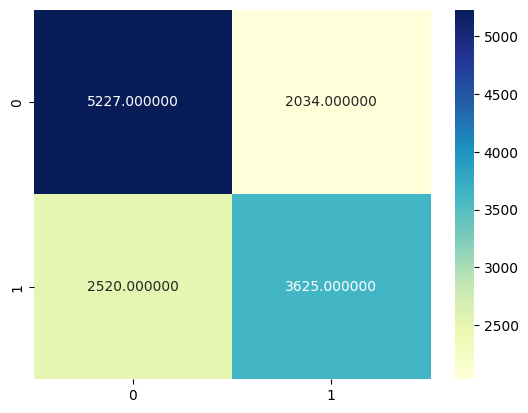

In [323]:
sns.heatmap(cm,annot = True,fmt = "f",cmap = "YlGnBu")

In [324]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.6603013576010741

In [325]:

sample = "I will kill you"
sample = clean_data(sample)
#sample



In [326]:
data1 = cv.transform([sample]).toarray()
dt.predict(data1)


array(['hate'], dtype=object)